<a href="https://colab.research.google.com/github/cassiolm/Data_Analysis/blob/master/Sentiment_Analysis_Peaky_Blinders_S05_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen as uReq
import csv

In [0]:
rotten_urls = ['https://www.rottentomatoes.com/tv/peaky_blinders/s05/reviews?type=&sort=']*2

In [0]:
page = 1
while (page<=2):
  url_pos = page-1
  rotten_urls[url_pos] = rotten_urls[url_pos] + '&page='+ str(page)
  page = page+1

In [5]:
rotten_urls

['https://www.rottentomatoes.com/tv/peaky_blinders/s05/reviews?type=&sort=&page=1',
 'https://www.rottentomatoes.com/tv/peaky_blinders/s05/reviews?type=&sort=&page=2']

In [0]:
reviews = []
for url in rotten_urls:
  uClient = uReq(url)
  page_html = uClient.read()
  uClient.close()
  page_soup = soup(page_html, 'html.parser')
  reviews = reviews + [review.text for review in page_soup.find_all("div",{"class":"critic__review-quote"})]

In [7]:
len(reviews)

25

In [8]:
reviews

["\n                                    The show's style is so ludicrously over-the-top you have to surrender all cynicism as the Shelbys stride in slow-mo to Black Sabbath. So the longer you stick with it, the more the swagger becomes impossible to resist.\n                                ",
 "\n                                    Season 5 might not be Peaky Blinders' strongest, but it still does a bang-up job of leaving you properly hyped for Season 6, ending with a proper nail-biter of a cliffhanger.\n                                ",
 '\n                                    It is refreshing to see that even in its fifth season, the series can still ratchet up the tension and put the squeeze on its unlawful family in such a confident and entertaining way.\n                                ',
 "\n                                    This season proved the show could evolve without losing its focus on the intimate, inner workings of the Shelby family. And after the shocking events of th

In [0]:
#write the csv file with reviews
with open ('rotten_reviews.csv', 'w') as myfile:
  wr = csv.writer(myfile , quoting = csv.QUOTE_ALL)
  wr.writerow(reviews)

#**CHECKPOINT: Run the code above only one time, after that only run after this point**

In [10]:
import csv
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
#read the csv file with reviews for check
with open ('rotten_reviews.csv', 'r') as f:
  reader = csv.reader(f)
  reviews = list(reader)[0]

In [12]:
len(reviews)

25

In [0]:
stop_words = set(stopwords.words('english'))
word_tokens=[]
for review in reviews:
  word_tokens = word_tokens + word_tokenize(review)

filtered_word_reviews = [w for w in word_tokens if not w in stop_words]

In [17]:
print(word_tokens[:10])
print(filtered_word_reviews[:10])

['The', 'show', "'s", 'style', 'is', 'so', 'ludicrously', 'over-the-top', 'you', 'have']
['The', 'show', "'s", 'style', 'ludicrously', 'over-the-top', 'surrender', 'cynicism', 'Shelbys', 'stride']


In [20]:
len(filtered_word_reviews)

494

In [0]:
def drawWordCloud(words, filename):
  text = ''
  for w in words:
    text = text + ' ' + w
  
  mask = np.array(Image.open("peaky.jpeg"))
  image_colors = ImageColorGenerator(mask)

  #take relative word frequencies into account, lower max_font_size
  wordcloud = WordCloud(background_color="white", max_words = 1000,mask = mask).generate(text)

  fig, axes = plt.subplots(1, 2, figsize=( 16,20))
  axes[0].imshow(mask, cmap=plt.cm.gray, interpolation = "bilinear")
  axes[1].imshow(wordcloud.recolor(color_func=image_colors, random_state=3),
                 interpolation ='bilinear')
  
  for ax in axes:
    ax.set_axis_off()
    plt.savefig(filename+ ".png", format="png", dpi=200)
    plt.show()

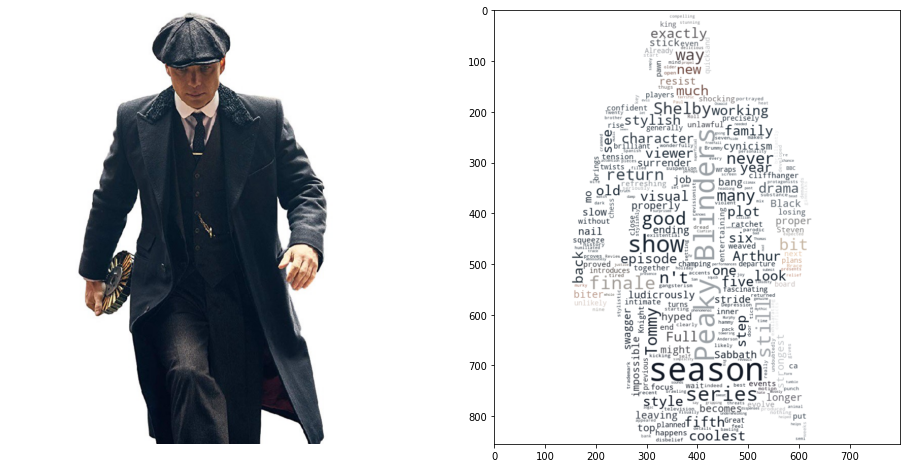

<Figure size 432x288 with 0 Axes>

In [46]:
drawWordCloud(filtered_word_reviews, 'wc-peaky')

In [47]:
adjs = [word for (word, pos) in nltk.pos_tag(filtered_word_reviews) if(pos[:2] == 'JJ')]
print (adjs[:10])

['over-the-top', 'slow-mo', 'stick', 'swagger', 'impossible', 'bang-up', 'proper', 'nail-biter', 'fifth', 'ratchet']


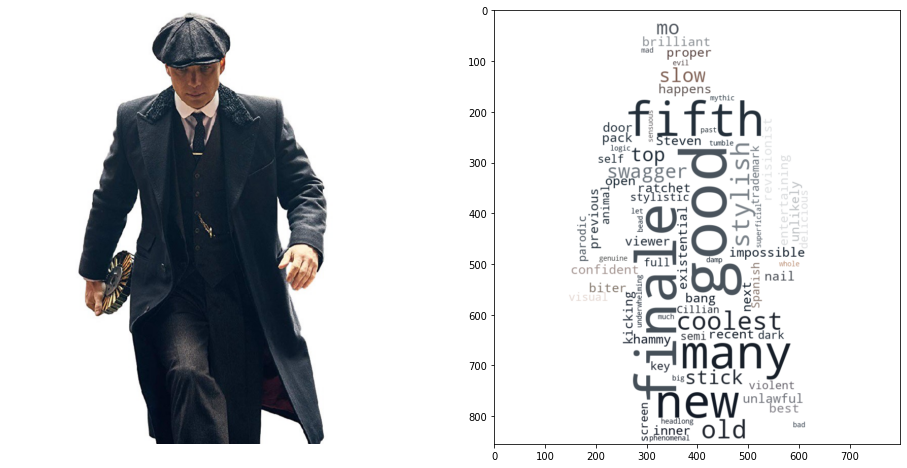

<Figure size 432x288 with 0 Axes>

In [48]:
drawWordCloud(adjs, 'wc-peaky-adjs')

In [51]:
import googletrans
from googletrans import Translator

ModuleNotFoundError: ignored

In [52]:
translator = Translator()
translations = translator.translate(adjs[:100], dest='pt')
adjs_pt = []
for translation in translations:
    adjs_pt.append(translation.text)

NameError: ignored

In [54]:
#ajds_pt
drawWordCloud(adjs_pt, "wc-joker-adjs-pt")

NameError: ignored